In [1]:
import numpy as np
from scipy.cluster import vq
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def loadFromTSP(filename):
    """ Inputs the TSP file named by filename, and returns a (nbrPoints,2)
    numpy array of the data points."""
    data=open(filename, 'r')
    data=data.readlines()[6:-1]
    final_data=[]
    for line in data:
        line=line.replace('\n','')
        line=line.split(" ")
        final_data.append([float(line[1]), float(line[2])])
    return np.array(final_data)

# Q.2

In [3]:
def scatterplotOfClusters(data, centroids, labels, cmap_name='gist_rainbow'):
    cluster_data=[]
    
    # set figure size
    plt.figure(figsize=(10,7))
    
    # save cluster data in cluster_data
    for i in range(8):
        cluster_data.append(data[labels == i])
    
    # define cmap
    cmap = matplotlib.cm.get_cmap(cmap_name)
    
    # plot cluster data and their centroid
    # cmap((i+1)/8) : to get different colors
    
    for i in range(8):
        plt.plot(cluster_data[i][:, 0],cluster_data[i][:, 1], 'o',color=cmap((i+1)/8),mec='black',ms=10)
        plt.plot(centroids[i][0] ,centroids[i][1], 's',color=cmap((i+1)/8),mec='black',ms=10)
        
    # set cmap_name
    plt.set_cmap(cmap_name)
    
    # show the graph
    plt.show()

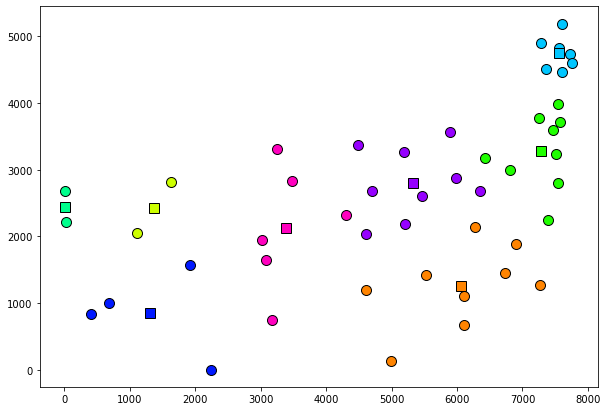

In [4]:
data = loadFromTSP('att48.tsp')  

# minit = 'points' :- select k observations (rows) at random from data for the initial centroids.
# Hence every time you run this program every time graph and centroid will change

centroids, labels = vq.kmeans2(data, 8, minit='points')
scatterplotOfClusters(data, centroids, labels)

# Q.3

In [5]:
def plotWithinSS(avgWithinSS,**kwargs):

    x = list(range(1,25))
    y = avgWithinSS
    
    # set figure size
    plt.figure(figsize=(10,7))
    
    # draw line plot
    plt.plot(x,y,'-o',color='blue')
    
    # set x and y label
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    
    # set y limit
    plt.ylim(0,8000000)
    
    plt.ticklabel_format(style='plain')
    plt.show()

In [6]:
def avgWithinSS(data,centroids,labels):
    k = len(centroids)
    res = 0.0
    for c in range(k):
        flags = labels == c
        pointsInC = data[flags]
        def d2(p):
            delta = p - centroids[c]
            return sum(delta*delta)
        dists = np.apply_along_axis(d2,axis=1,arr=pointsInC)
        res += sum(dists)/len(pointsInC)
    return res/k

In [7]:
def avgWithinSSOverK(data,kmax):
    def f(k):
        return vq.kmeans2(data,k,minit='points')
    return [avgWithinSS(data,*f(k)) for k in range(1,kmax+1)]

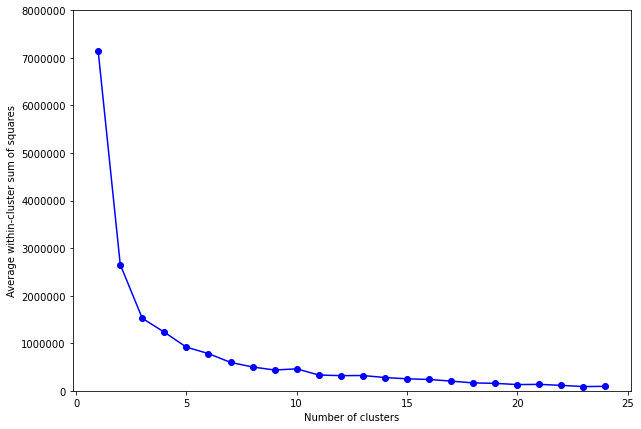

In [8]:
plotWithinSS(avgWithinSSOverK(data,24))

# Q.4

In [9]:
def plotMultipleRuns(data, k, bins=20, nbrRuns=200, **kwargs):
    x=[]
    
    # run kmeans2, nbrRuns number of times.
    # call avgWithinSS() with the centroids and labels received from kmeans2
    # store the values in x
    for i in range(nbrRuns):
        
        # try-except block to handle cases of No cluster.
        try:  
            centroids, labels = vq.kmeans2(data, k, minit='points',missing='warn')
            x.append(avgWithinSS(data,centroids,labels))
        except:
            pass
    
    # set figure size.
    plt.figure(figsize=(10,7))
    
    # set the color
    if 'facecolor' in kwargs:
        hist_color = kwargs['facecolor']
    else:
        hist_color = None
    
    # plot histogram 
    plt.hist(x,bins=bins, histtype='bar', ec='black',color=hist_color)
    
    # show the graph.
    plt.show()

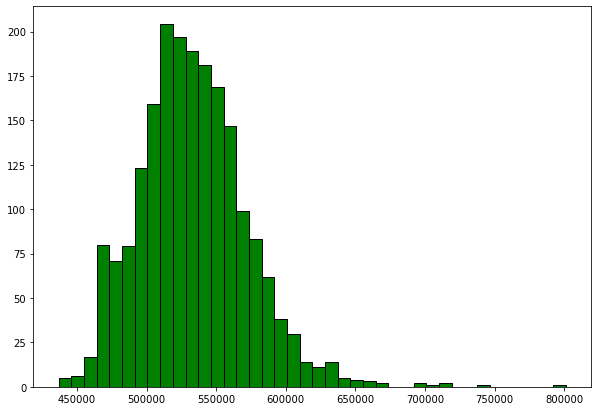

In [10]:
# Since every run of Kmeans choose different centroid, Hence the data
# within a cluster will also be different and hence avgWithinSS() will return different set of values
# in every run.Therefore histogram will change everytime you run the code.
plotMultipleRuns(data, 8, 40, 2000,facecolor='green')